# Scratch Artificial Neural Network

In [94]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import sys
sys.dont_write_bytecode = True
sys.path.append('..')


# Import libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Import custom modules
from ArtificialNeuralNetwork import ArtificialNeuralNetwork
from Layer import Layer, OutputLayer, InputLayer
from Function import ActivationFunction, LossFunction
from enums import InitializerType, RegularizationType

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Pipeline for testing MNIST dataset

In [96]:
input_size = 784
hidden_layers = 5
hidden_size = 128
output_size = 10
learning_rate = 0.1
param_1 = 0
param_2 = 0.5
batch_size = 64


In [97]:
# Load MNIST dataset using fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0
y = y.astype(int)


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

In [98]:
# Common parameters
input_size = 784           # adjust as per your data
output_size = 10          # number of classes
hidden_layers = 5         # number of hidden layers
param_1 = 0.0             # parameter for random initialization
param_2 = 0.5             # parameter for random initialization

# Dictionary to hold the models
models_by_initializer = {}

for init_type in InitializerType:
    model = ArtificialNeuralNetwork(
        123,
        InputLayer(input_size=input_size),
        Layer(
            weight_init=init_type,
            bias_init=init_type,
            input_size=input_size,
            num_neurons=20,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.prelu,
            alpha=0.2,
            layer_name="Hidden Layer 0",
        ),
        *[
            Layer(
                weight_init=init_type,
                bias_init=init_type,
                input_size=20,
                num_neurons=20,
                param_1=param_1,
                param_2=param_2,
                activation=ActivationFunction.prelu,
                alpha=0.2,
                layer_name=f"Hidden Layer {_}",
            )
            for _ in range(hidden_layers - 1)
        ],
        OutputLayer(
            weight_init=init_type,
            bias_init=init_type,
            input_size=20,
            num_neurons=output_size,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.softmax,
            loss_funct=LossFunction.categorical_cross_entropy,
            layer_name="Output Layer"
        )
    )
    models_by_initializer[init_type.name] = model

# `models_by_initializer` holds a model for each initializer type


In [99]:
model_loss = {}

for name, model in models_by_initializer.items():
    print(f"\nTraining model with {name} initializer...\n" + "-" * 50)

    # history = 
    loss = model.train(
        x=X_train,
        y=y_train,
        loss_function=LossFunction.categorical_cross_entropy,
        lr=0.01,
        epochs=20,
        batch_size=batch_size,
        verbose=True,
        validation_data=(X_test, y_test),
    )

    model_loss[name] = loss  # Store training history for analysis



Training model with ZERO initializer...
--------------------------------------------------


Training: 100%|██████████| 20/20 [00:49<00:00,  2.50s/it, Loss: 14.5019, Val Loss: 14.5014]


Total training time: 48.38s

Training model with RANDOM_DIST_UNIFORM initializer...
--------------------------------------------------


Training: 100%|██████████| 20/20 [00:54<00:00,  2.71s/it, Loss: 3.6578, Val Loss: 3.7035] 


Total training time: 52.60s

Training model with RANDOM_DIST_NORMAL initializer...
--------------------------------------------------


Training: 100%|██████████| 20/20 [00:49<00:00,  2.47s/it, Loss: 1.2168, Val Loss: 1.3119] 


Total training time: 47.75s

Training model with XAVIER initializer...
--------------------------------------------------


Training: 100%|██████████| 20/20 [01:01<00:00,  3.08s/it, Loss: 1.1335, Val Loss: 1.2522]


Total training time: 59.73s

Training model with HE initializer...
--------------------------------------------------


Training: 100%|██████████| 20/20 [00:53<00:00,  2.68s/it, Loss: 0.9393, Val Loss: 1.1010]

Total training time: 51.99s


In [100]:
from sklearn.metrics import f1_score

f1_scores = {}

for name, model in models_by_initializer.items():
    print(f"Evaluating model with {name} initializer...")

    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred, average='macro')

    f1_scores[name] = score
    print(f"{name} F1 Score: {score:.4f}")


Evaluating model with ZERO initializer...
ZERO F1 Score: 0.0205
Evaluating model with RANDOM_DIST_UNIFORM initializer...
RANDOM_DIST_UNIFORM F1 Score: 0.8644
Evaluating model with RANDOM_DIST_NORMAL initializer...
RANDOM_DIST_NORMAL F1 Score: 0.9452
Evaluating model with XAVIER initializer...
XAVIER F1 Score: 0.9462
Evaluating model with HE initializer...
HE F1 Score: 0.9505


C:\Users\DELL\AppData\Local\Temp\ipykernel_22828\440176850.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab20', len(model_loss) * 2)  # times 2 for train and val


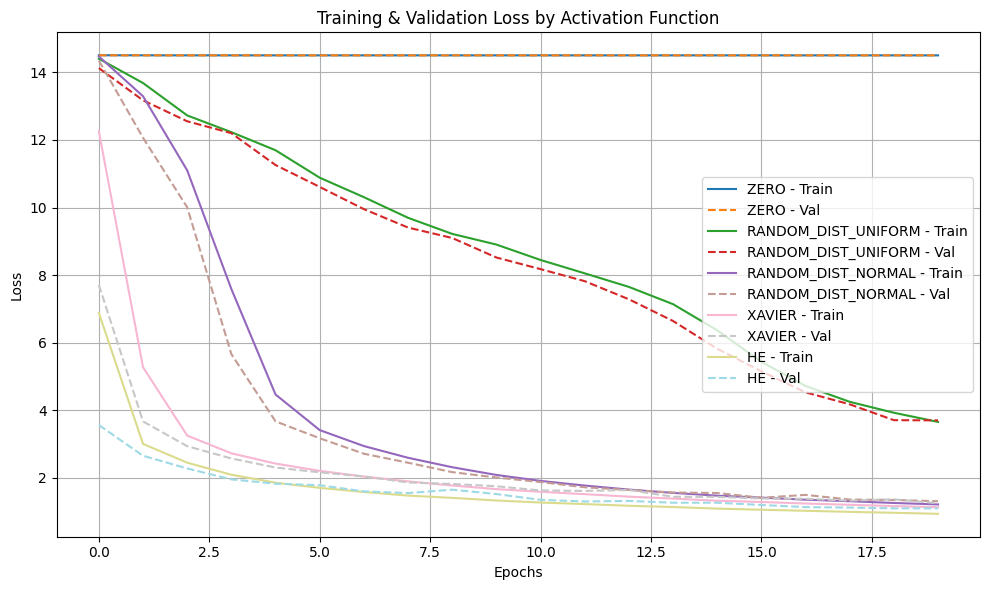

In [101]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

plt.figure(figsize=(10, 6))

# Get a color map with enough unique colors
color_map = cm.get_cmap('tab20', len(model_loss) * 2)  # times 2 for train and val

for idx, (name, (train_loss, val_loss)) in enumerate(model_loss.items()):
    color_train = color_map(idx * 2)
    color_val = color_map(idx * 2 + 1)
    plt.plot(train_loss, label=f'{name} - Train', color=color_train)
    plt.plot(val_loss, linestyle='--', label=f'{name} - Val', color=color_val)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss by Activation Function')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




==================== ZERO Weight Distribution ====================


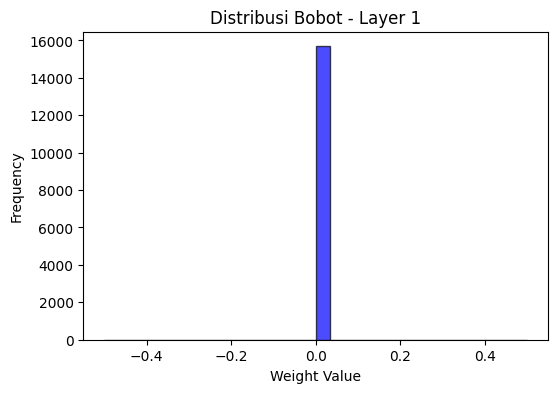

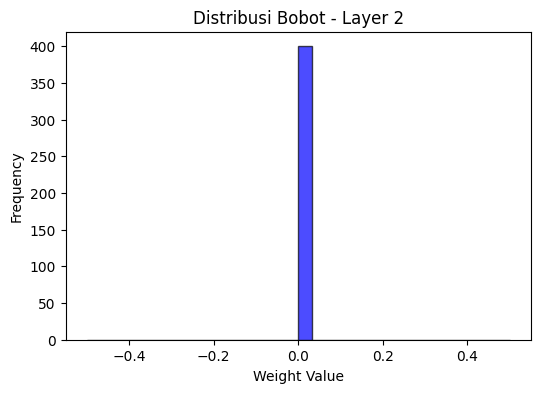

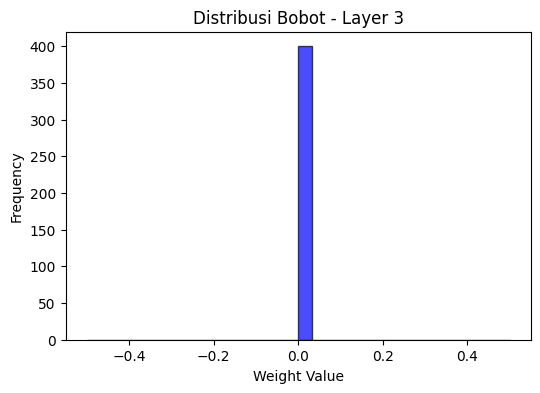


==================== RANDOM_DIST_UNIFORM Weight Distribution ====================


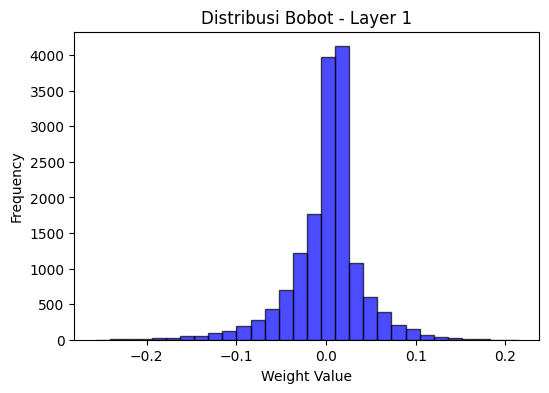

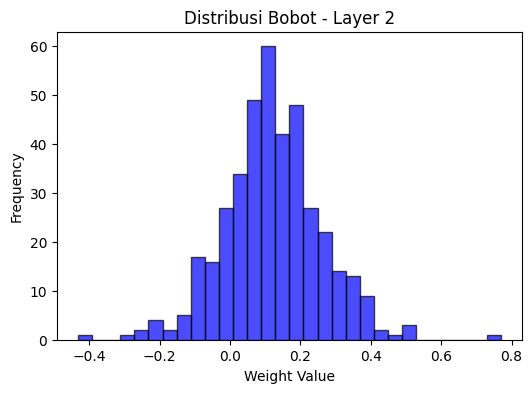

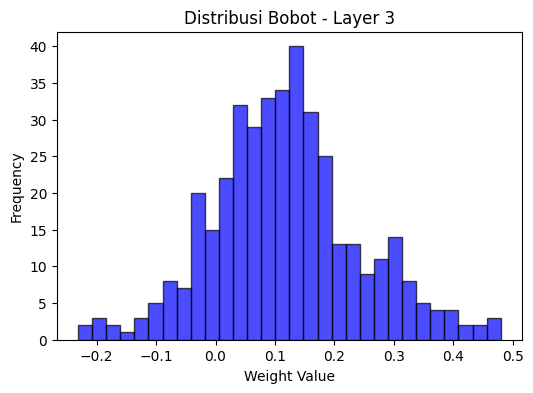


==================== RANDOM_DIST_NORMAL Weight Distribution ====================


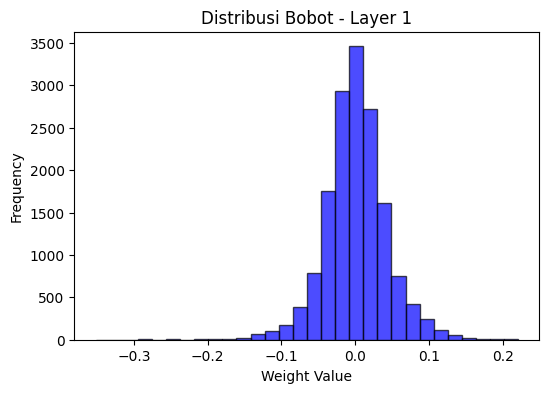

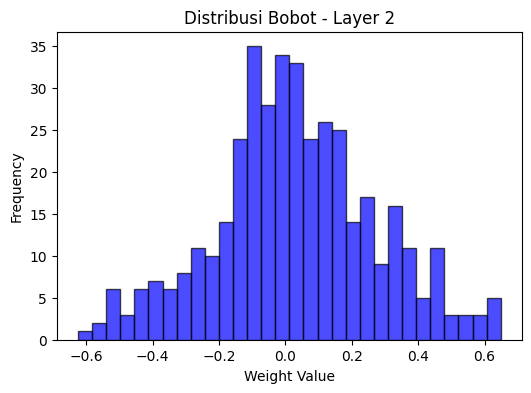

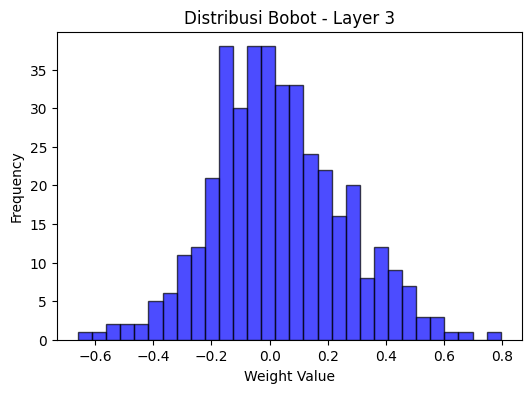


==================== XAVIER Weight Distribution ====================


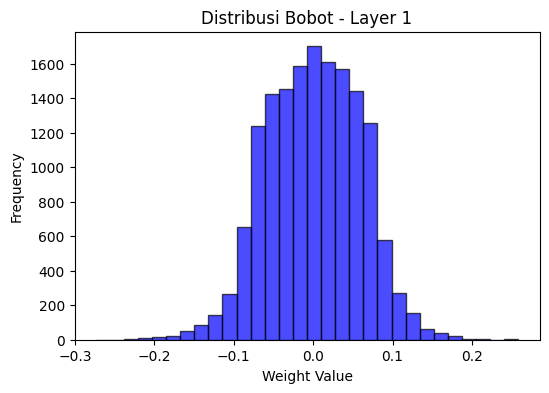

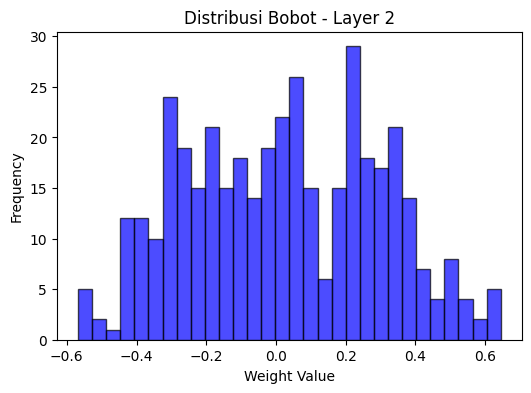

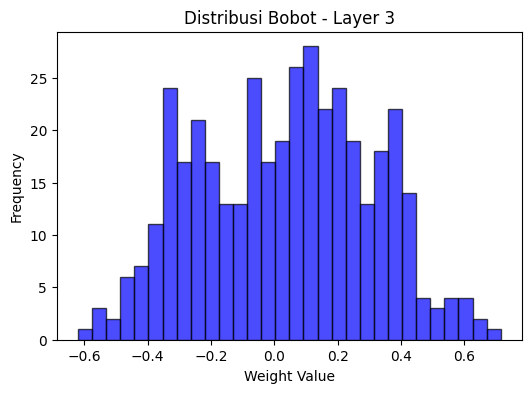


==================== HE Weight Distribution ====================


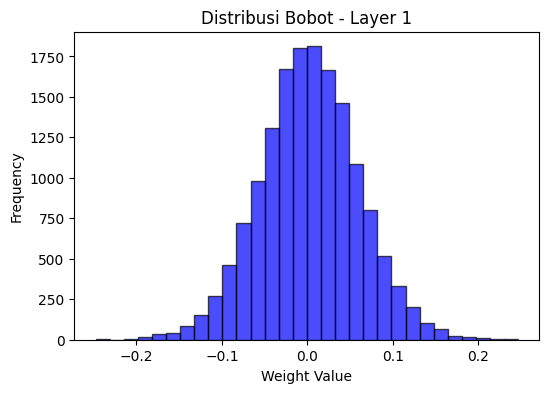

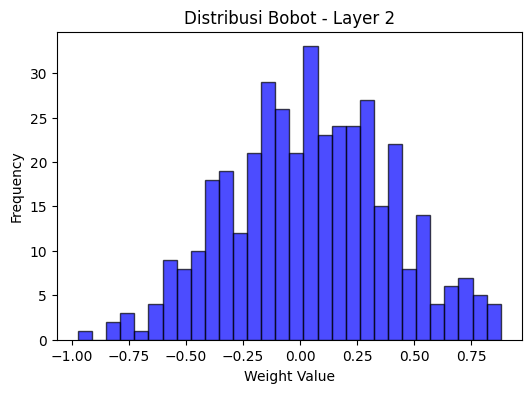

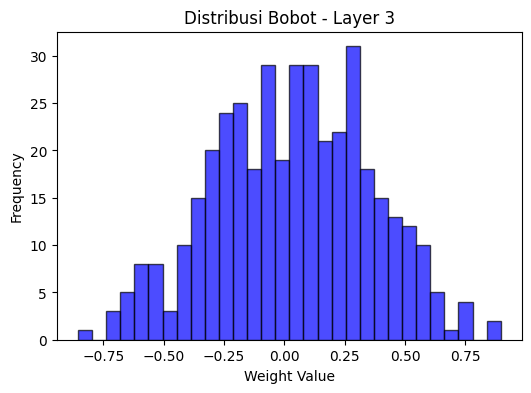

In [102]:
# ann.visualize_weight_distribution((1,2,3))


# Tuple indicating which layers to visualize
layers_to_visualize = (1, 2, 3)  # Adjust based on your actual architecture

for name, model in models_by_initializer.items():
    print(f"\n{'='*20} {name} Weight Distribution {'='*20}")
    model.visualize_weight_distribution(layers_to_visualize)



==================== ZERO Weight Gradient Distribution ====================


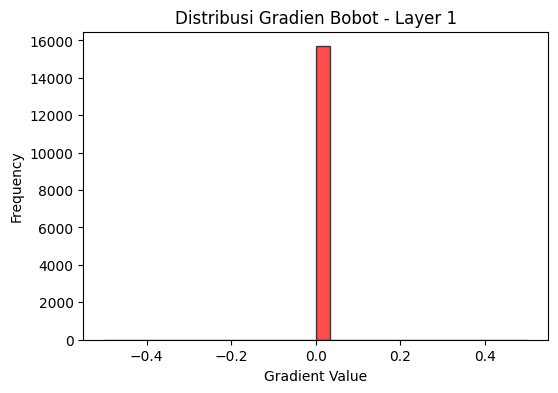

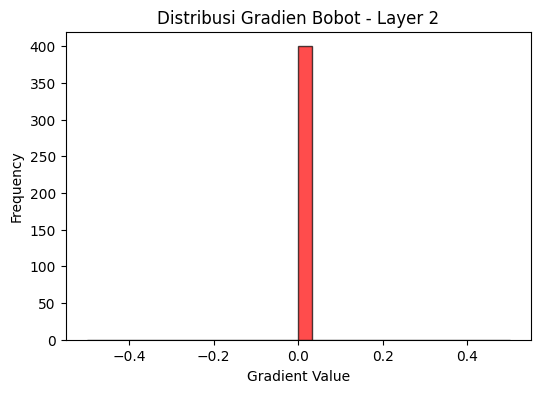

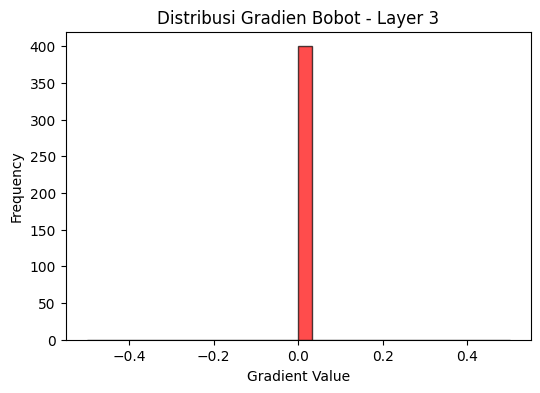


==================== RANDOM_DIST_UNIFORM Weight Gradient Distribution ====================


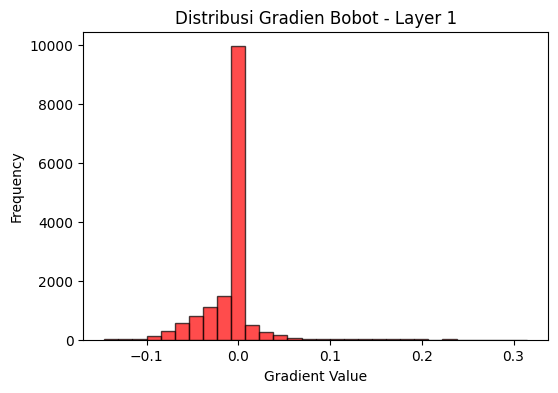

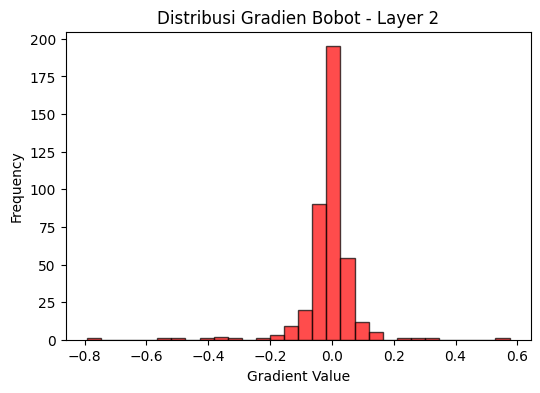

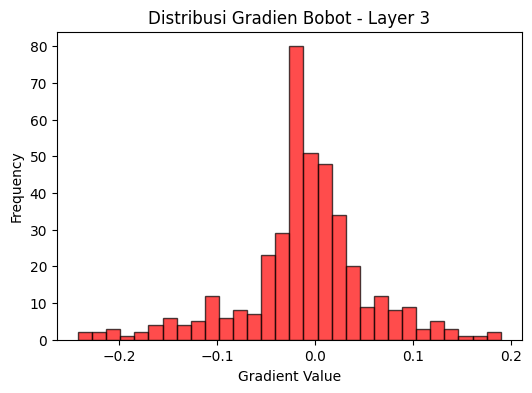


==================== RANDOM_DIST_NORMAL Weight Gradient Distribution ====================


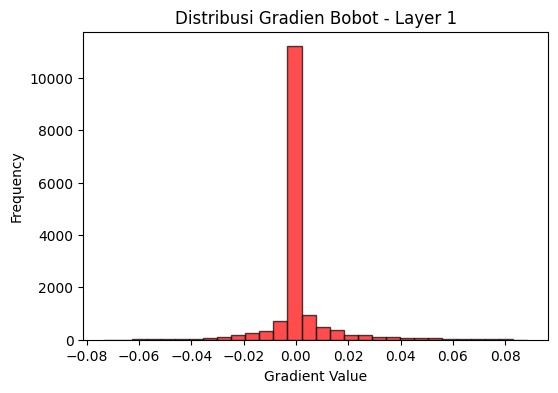

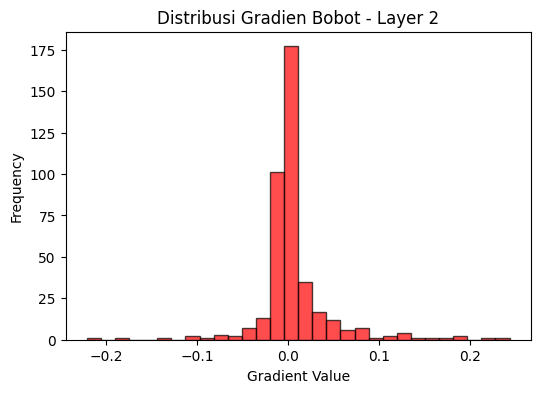

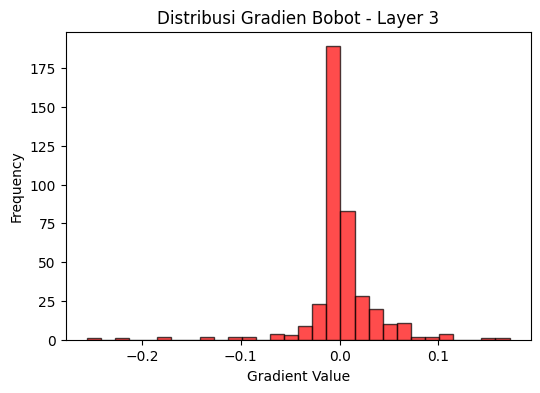


==================== XAVIER Weight Gradient Distribution ====================


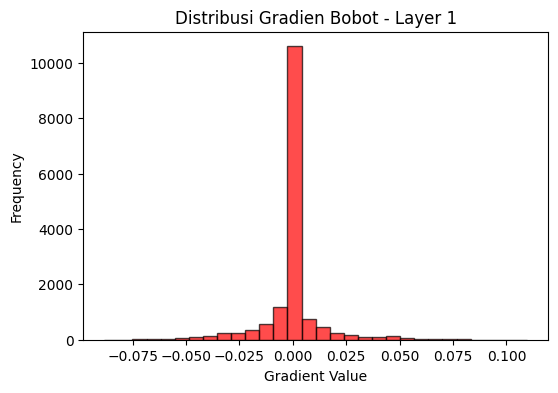

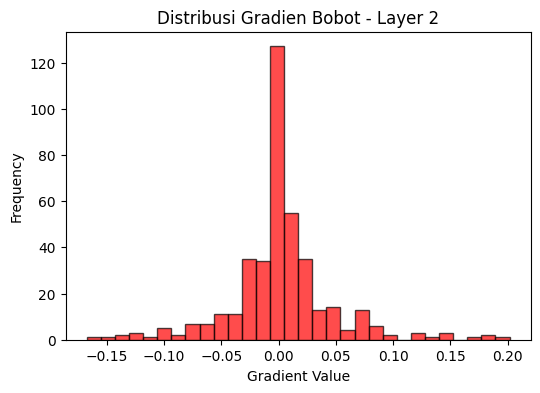

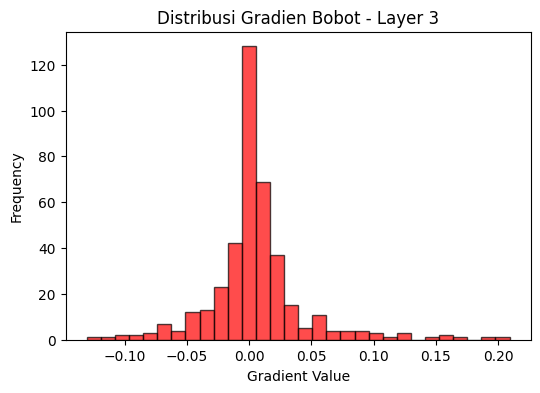


==================== HE Weight Gradient Distribution ====================


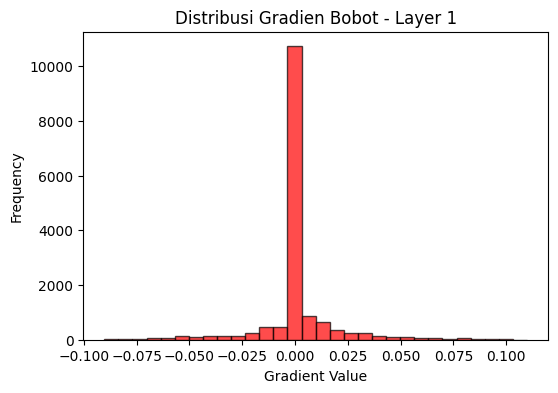

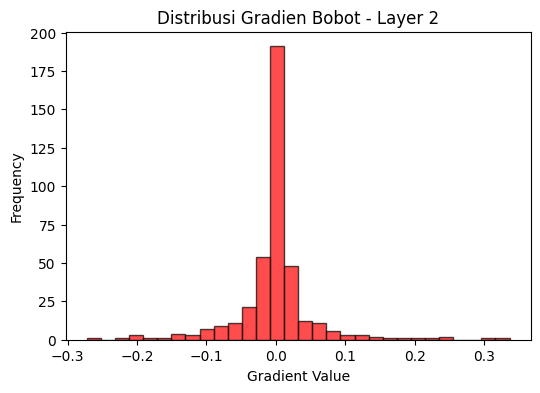

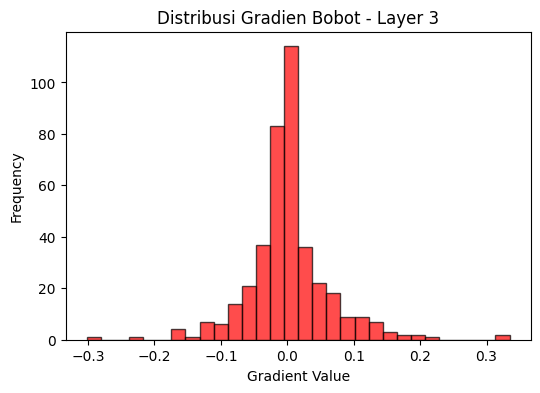

In [103]:
# ann.visualize_weight_distribution((1,2,3))

import matplotlib.pyplot as plt

# Tuple indicating which layers to visualize
layers_to_visualize = (1, 2, 3)  # Adjust based on your actual architecture

for name, model in models_by_initializer.items():
    print(f"\n{'='*20} {name} Weight Gradient Distribution {'='*20}")
    model.visualize_gradient_distribution(layers_to_visualize)
